# Coding Temple's Data Analytics Program
---
## Python for DA: Weekend Project

For this weekend project, you will be connecting to the [Disney API](https://disneyapi.dev/) to create an ETL pipeline. Your project should contain:

- etl_pipeline.py
    - Loads in data from the API object for all characters
    - Stores required fields from the API to a DataFrame
        - name
        - all movies/shows the character appeared in
        - any allies
        - any enemies
        - any park attractions
    - Cleans the data
    - Performs any transformations/feature engineering you wish to complete
    - Stores the data in an ElephantSQL server
    - Stores the data in a .csv file

- notebook.ipynb
    - Contains all cells you used to test your code before loading it into the pipeline
    - Loads in the data from your .csv file
    - Conduct EDA through data
    - Conduct an analysis on your dataset!

In [ ]:
import seaborn as sns, pandas as pd, requests, matplotlib.pyplot as plt


In [57]:
url = 'https://api.disneyapi.dev/character'
response = requests.get(url)
my_character_data = response.json()['data']
my_character_data
result = pd.DataFrame.from_dict(my_character_data)
variable = "".join('[Hercules (TV series)]')
my_character_data.append(variable)
my_character_data


[{'_id': 112,
  'films': ['Hercules (film)'],
  'shortFilms': [],
  'tvShows': ['Hercules (TV series)'],
  'videoGames': ['Kingdom Hearts III'],
  'parkAttractions': [],
  'allies': [],
  'enemies': [],
  'sourceUrl': 'https://disney.fandom.com/wiki/Achilles_(Hercules)',
  'name': 'Achilles',
  'imageUrl': 'https://static.wikia.nocookie.net/disney/images/d/d3/Vlcsnap-2015-05-06-23h04m15s601.png',
  'createdAt': '2021-04-12T01:31:30.547Z',
  'updatedAt': '2021-12-20T20:39:18.033Z',
  'url': 'https://api.disneyapi.dev/characters/112',
  '__v': 0},
 {'_id': 18,
  'films': ['The Fox and the Hound', 'The Fox and the Hound 2'],
  'shortFilms': [],
  'tvShows': [],
  'videoGames': [],
  'parkAttractions': [],
  'allies': [],
  'enemies': [],
  'sourceUrl': 'https://disney.fandom.com/wiki/Abigail_the_Cow',
  'name': 'Abigail the Cow',
  'imageUrl': 'https://static.wikia.nocookie.net/disney/images/0/05/Fox-disneyscreencaps_com-901.jpg',
  'createdAt': '2021-04-12T01:26:03.413Z',
  'updatedAt': 

In [25]:
# import pandas as pd, requests
# new_data = []
# url = 'https://api.disneyapi.dev/character'
# response = requests.get(url)
# print(response)
# print(response.json())
# my_character_data = response.json()['data']

# def get_character_info(data):
#     """
#     Input: response object from API
#     Takes the response and creates a dictionary containing the fields we want from the racer's information
#     Output: List object containing a dictionary for each racer in the response object
#     """
#     new_data = []
#     for character in data:
#         character_dict ={}
#         character_name = f'{character["name"]}'

#         character_dict[character_name] = {
#             'name' : character['name'],
#             'tv_shows' : character['tvShows'],
#             'park_attractions' : character['parkAttractions']
#         }
#         new_data.append(character_dict)
#     return new_data

# new_dict = get_character_info(my_character_data)

# pd.DataFrame.from_dict(new_dict)
    

In [27]:
url = 'https://api.disneyapi.dev/character'
response = requests.get(url)
# Now, to store required fields from API into a DataFrame
my_character_data = response.json()['data']
# Step 1: Create variable for each required column
names = [my_character_data[x]['name'] for x in range(len(my_character_data))] # Name
tv_shows = [my_character_data[x]['tvShows'] for x in range(len(my_character_data))] # Tv Shows
allies = [my_character_data[x]['allies'] for x in range(len(my_character_data))] # Checked, no allies listed in dict
enemies = [my_character_data[x]['enemies'] for x in range(len(my_character_data))] # No enemies listed in dict
park_attractions = [my_character_data[x]['parkAttractions'] for x in range(len(my_character_data))] # Park Attractions
# Step 2: Create dictionary with each available variable
my_character_dict = {
'names': names,
'tv_shows': tv_shows,
'park_attractions': park_attractions}
# Step 3: Convert Dictionary to DataFrame
df = pd.DataFrame.from_dict(my_character_dict)
df
# result = df[(df['park_attractions'] == '[]')]
# result2 = result.drop('[]').reset_index(drop=True).head(1)
# display(result2)
df[(df['park_attractions']=='[]')]=df[(df['park_attractions']=='[]')]=' '
df

,names,tv_shows,park_attractions
0,Achilles,[Hercules (TV series)],[]
1,Abigail the Cow,[],[]
2,Abdullah,[],[]
3,Admiral Boom and Mr. Binnacle,[],[]
4,.GIFfany,[Gravity Falls],[]
5,90's Adventure Bear,[Pickle and Peanut],[]
6,Candace Adams,[K.C. Undercover],[]
7,Ahadi,[],[]
8,Al Muddy Sultan,[Aladdin (TV series)],[]
9,Irwina Allen,[Chip 'n Dale Rescue Rangers],[]


In [28]:

# import requests, json

# # def upload_filepaith(filepath): # create a filepath to upload the API object
# url = 'https://api.disneyapi.dev/character'
# response = requests.get(url)
# # Now, to store required fields from API into a DataFrame
# my_character_data = response.json()['data']
# # Step 1: Create variable for each required column
# names = [my_character_data[x]['name'] for x in range(len(my_character_data))] # Name
# tv_shows = [my_character_data[x]['tvShows'] for x in range(len(my_character_data))] # Tv Shows
# allies = [my_character_data[x]['allies'] for x in range(len(my_character_data))] # Checked, no allies listed in dict
# enemies = [my_character_data[x]['enemies'] for x in range(len(my_character_data))] # No enemies listed in dict
# park_attractions = [my_character_data[x]['parkAttractions'] for x in range(len(my_character_data))] # Park Attractions
# # Step 2: Create dictionary with each available variable
# my_character_dict = {
# 'names': names,
# 'tv_shows': tv_shows,
# 'park_attractions': park_attractions}
# # Step 3: Convert Dictionary to DataFrame
# df = pd.DataFrame.from_dict(my_character_dict)
# # Create a .csv file:
# # df.to_csv('etl_pipeline.csv', index=False)
# df


ConversionError: Failed to convert value(s) to axis units: array(['Tortuga Tavern'], dtype='<U14')

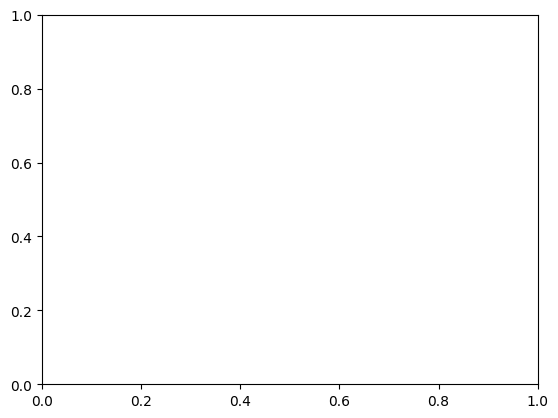

In [48]:
import seaborn as sns, matplotlib.pyplot as plt
plt.hist('park_attractions', data=df)